<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_2_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,87.480103,44.802076,-0.002484,142.279695,142.279063,0.000632
1,0.0,1.0,41.360286,99.872322,0.000014,151.232622,151.235334,-0.002712
2,0.0,2.0,94.030808,66.047200,-0.001778,170.076229,170.074908,0.001322
3,0.0,3.0,90.374149,61.238535,-0.002618,161.610067,161.609781,0.000286
4,0.0,4.0,21.905467,31.512245,0.017691,63.435403,63.420240,0.015163
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.253624,57.488573,0.000860,105.743057,105.742960,0.000098
19996,999.0,16.0,93.562407,78.400071,0.001038,181.963516,181.964483,-0.000967
19997,999.0,17.0,75.626869,42.976809,-0.001613,128.602064,128.604889,-0.002825
19998,999.0,18.0,37.921432,39.395349,-0.001875,87.314907,87.317292,-0.002385


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,87.480103,44.802076,-0.002484,142.279695,142.279063,0.000632
1,0.0,1.0,41.360286,99.872322,0.000014,151.232622,151.235334,-0.002712
2,0.0,2.0,94.030808,66.047200,-0.001778,170.076229,170.074908,0.001322
3,0.0,3.0,90.374149,61.238535,-0.002618,161.610067,161.609781,0.000286
4,0.0,4.0,21.905467,31.512245,0.017691,63.435403,63.420240,0.015163
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.253624,57.488573,0.000860,105.743057,105.742960,0.000098
19996,999.0,16.0,93.562407,78.400071,0.001038,181.963516,181.964483,-0.000967
19997,999.0,17.0,75.626869,42.976809,-0.001613,128.602064,128.604889,-0.002825
19998,999.0,18.0,37.921432,39.395349,-0.001875,87.314907,87.317292,-0.002385


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    87.480103  44.802076 -0.002484  142.279695  142.279063  0.000632
      1.0    41.360286  99.872322  0.000014  151.232622  151.235334 -0.002712
      2.0    94.030808  66.047200 -0.001778  170.076229  170.074908  0.001322
      3.0    90.374149  61.238535 -0.002618  161.610067  161.609781  0.000286
      4.0    21.905467  31.512245  0.017691   63.435403   63.420240  0.015163
...                ...        ...       ...         ...         ...       ...
999.0 15.0   38.253624  57.488573  0.000860  105.743057  105.742960  0.000098
      16.0   93.562407  78.400071  0.001038  181.963516  181.964483 -0.000967
      17.0   75.626869  42.976809 -0.001613  128.602064  128.604889 -0.002825
      18.0   37.921432  39.395349 -0.001875   87.314907   87.317292 -0.002385
      19.0   44.599910  50.657689  0.001857  105.259456  105.258379  0.001077

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    87.480103  44.802076 -0.002484  142.279695  142.279063  0.000632
      1.0    41.360286  99.872322  0.000014  151.232622  151.235334 -0.002712
      2.0    94.030808  66.047200 -0.001778  170.076229  170.074908  0.001322
      3.0    90.374149  61.238535 -0.002618  161.610067  161.609781  0.000286
      4.0    21.905467  31.512245  0.017691   63.435403   63.420240  0.015163
...                ...        ...       ...         ...         ...       ...
999.0 15.0   38.253624  57.488573  0.000860  105.743057  105.742960  0.000098
      16.0   93.562407  78.400071  0.001038  181.963516  181.964483 -0.000967
      17.0   75.626869  42.976809 -0.001613  128.602064  128.604889 -0.002825
      18.0   37.921432  39.395349 -0.001875   87.314907   87.317292 -0.002385
      19.0   44.599910  50.657689  0.001857  105.259456  105.258379  0.001077

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,87.480103,44.802076,-0.002484,142.279695,142.279063,0.000632
1,0.0,1.0,41.360286,99.872322,0.000014,151.232622,151.235334,-0.002712
2,0.0,2.0,94.030808,66.047200,-0.001778,170.076229,170.074908,0.001322
3,0.0,3.0,90.374149,61.238535,-0.002618,161.610067,161.609781,0.000286
4,0.0,4.0,21.905467,31.512245,0.017691,63.435403,63.420240,0.015163
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.253624,57.488573,0.000860,105.743057,105.742960,0.000098
19996,999.0,16.0,93.562407,78.400071,0.001038,181.963516,181.964483,-0.000967
19997,999.0,17.0,75.626869,42.976809,-0.001613,128.602064,128.604889,-0.002825
19998,999.0,18.0,37.921432,39.395349,-0.001875,87.314907,87.317292,-0.002385


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    87.480103  44.802076 -0.002484  142.279695  142.279063  0.000632
      1.0    41.360286  99.872322  0.000014  151.232622  151.235334 -0.002712
      2.0    94.030808  66.047200 -0.001778  170.076229  170.074908  0.001322
      3.0    90.374149  61.238535 -0.002618  161.610067  161.609781  0.000286
      4.0    21.905467  31.512245  0.017691   63.435403   63.420240  0.015163
...                ...        ...       ...         ...         ...       ...
999.0 15.0   38.253624  57.488573  0.000860  105.743057  105.742960  0.000098
      16.0   93.562407  78.400071  0.001038  181.963516  181.964483 -0.000967
      17.0   75.626869  42.976809 -0.001613  128.602064  128.604889 -0.002825
      18.0   37.921432  39.395349 -0.001875   87.314907   87.317292 -0.002385
      19.0   44.599910  50.657689  0.001857  105.259456  105.258379  0.001077

[20000 rows x 6 columns]

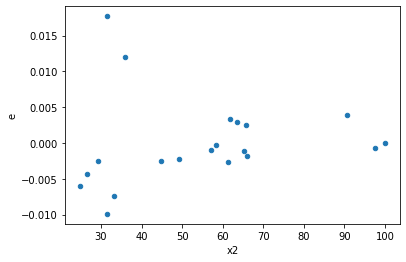

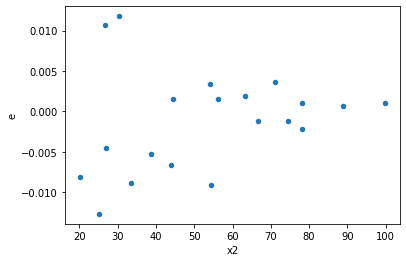

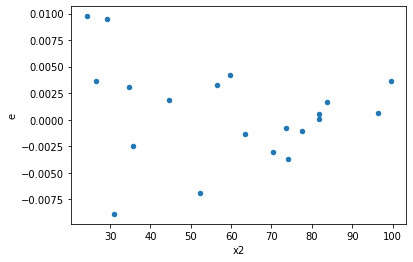

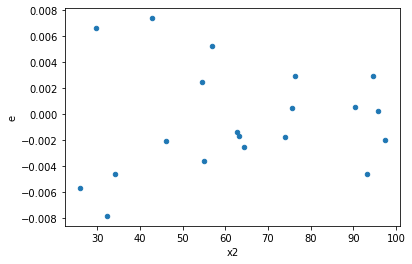

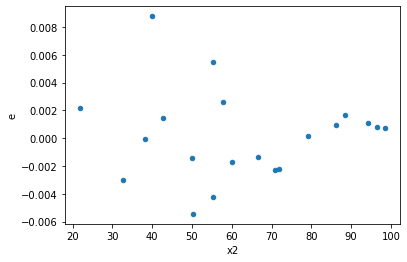

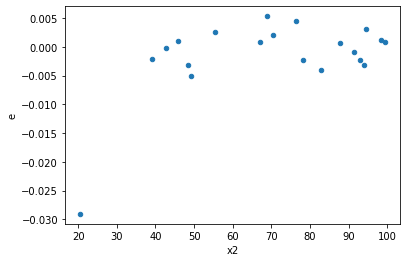

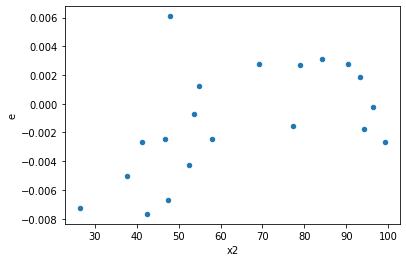

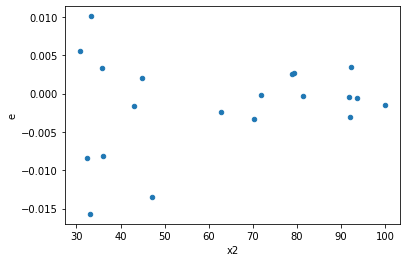

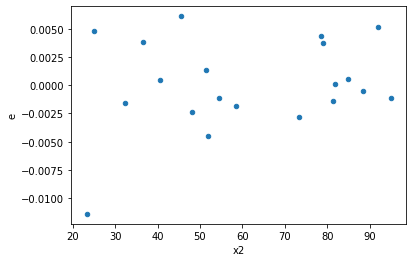

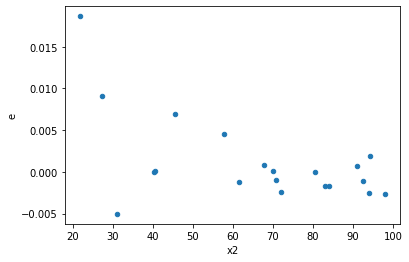

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
15.0,6.0,6.0,7.865787158696923e-05,0.0001420101507128408,1.3109645264494871e-05,2.3668358452140136e-05,1.8054156290743923,0.49054760969293865,0.7547261951535307,0.24527380484646932,Reject005=1 : Homoscedasticity
19.0,6.0,6.0,6.266922612734163e-05,6.521212763553571e-05,1.0444871021223604e-05,1.0868687939255952e-05,1.0405765583099271,0.9627257337791704,0.5186371331104148,0.4813628668895852,Reject005=1 : Homoscedasticity
22.0,6.0,6.0,4.5052262821822155e-05,0.00012602457505099095,7.5087104703036925e-06,2.1004095841831827e-05,2.797297342186948,0.23617663292278168,0.8819116835386092,0.11808831646139084,Reject005=1 : Homoscedasticity
39.0,6.0,6.0,2.3375983459483154e-05,0.00012097742579820855,3.895997243247192e-06,2.0162904299701423e-05,5.175287106439601,0.06563608030670132,0.9671819598466493,0.03281804015335066,Reject005=1 : Homoscedasticity
60.0,6.0,6.0,2.3583396231151748e-05,8.009459500522278e-05,3.930566038525292e-06,1.334909916753713e-05,3.39622818614328,0.162382717136335,0.9188086414318325,0.0811913585681675,Reject005=1 : Homoscedasticity
91.0,6.0,6.0,1.458812206847348e-05,2.9671055879048412e-05,2.4313536780789134e-06,4.945175979841402e-06,2.033918810096249,0.408773308311829,0.7956133458440855,0.2043866541559145,Reject005=1 : Homoscedasticity
103.0,6.0,6.0,4.255902164869823e-05,6.009660961612046e-05,7.093170274783038e-06,1.0016101602686742e-05,1.412076859101357,0.6858548851779531,0.6570725574110234,0.34292744258897656,Reject005=1 : Homoscedasticity
114.0,6.0,6.0,3.0646613347737106e-05,4.1980573387956095e-05,5.107768891289518e-06,6.996762231326016e-06,1.369827488330154,0.7121096514262955,0.6439451742868523,0.3560548257131477,Reject005=1 : Homoscedasticity
118.0,6.0,6.0,4.9625281222567226e-05,9.542384502059354e-05,8.270880203761205e-06,1.590397417009892e-05,1.9228877432980527,0.4461487174504897,0.7769256412747552,0.22307435872524484,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.00048735232173141,2.921732171448984e-05,8.1225386955235e-05,4.86955361908164e-06,0.059951128601767725,0.0033187254134282706,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,0.00032667794496014376,0.00015153675819976528,5.444632416002396e-05,2.5256126366627547e-05,0.4638720199438425,0.3722350695020133,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,7.760401893144927e-05,1.4282610856961198e-05,1.2934003155241546e-05,2.3804351428268663e-06,0.18404473187886825,0.05868622386126818,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,0.0002238726033533019,2.6719021647719193e-05,3.731210055888365e-05,4.453170274619866e-06,0.11934922472649717,0.020531312269395943,Reject005=0 : Heteroscedasticity
4.0,6.0,6.0,9.207915443133397e-05,3.0392145000374e-05,1.534652573855566e-05,5.065357500062333e-06,0.33006542238654335,0.20316338608060994,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,0.00035352565770633854,3.598823281279379e-05,5.892094295105642e-05,5.998038802132299e-06,0.10179807894647343,0.013668716246225295,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,5.394515404254478e-05,6.726199789625719e-06,8.990859007090796e-06,1.1210332982709532e-06,0.12468589457212385,0.022920577788609474,Reject005=0 : Heteroscedasticity
7.0,6.0,6.0,0.0002902113768856484,2.8832765606440134e-05,4.836856281427473e-05,4.805460934406689e-06,0.09935091420554844,0.01283296850566987,Reject005=0 : Heteroscedasticity
8.0,6.0,6.0,0.0001381024765484222,2.8490216863615495e-05,2.3017079424737034e-05,4.748369477269249e-06,0.2062976535661626,0.07612841842239756,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      521
Reject005=0 : Heteroscedasticity    479
Name: Result_test, dtype: int64